In [1]:
import numpy as np
import pandas as pd
import math
import pandas_datareader as web
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, LSTM
from tensorflow.data.experimental import AUTOTUNE as AUTO
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/eurusd_hour.csv', delimiter=',')
data.dataframe='eurusd_hour.csv'
nRow, nCol = data.shape
print(f'Rows={nRow} and Columns={nCol}')

Rows=93084 and Columns=12


In [3]:
data.head()

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.2852,1.2852,1.2840,1.2844,-0.0008,1.2854,1.2854,1.2842,1.2846,-0.0008
1,2005-05-02,01:00,1.2844,1.2848,1.2839,1.2842,-0.0002,1.2846,1.2850,1.2841,1.2844,-0.0002
2,2005-05-02,02:00,1.2843,1.2854,1.2841,1.2851,0.0008,1.2845,1.2856,1.2843,1.2853,0.0008
3,2005-05-02,03:00,1.2851,1.2859,1.2850,1.2851,0.0000,1.2853,1.2861,1.2852,1.2853,0.0000
4,2005-05-02,04:00,1.2852,1.2859,1.2849,1.2855,0.0003,1.2854,1.2861,1.2851,1.2857,0.0003


In [4]:
data.set_index(['Date'], inplace=True)
data.head(2)

,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
Date,,,,,,,,,,,
2005-05-02,00:00,1.2852,1.2852,1.2840,1.2844,-0.0008,1.2854,1.2854,1.2842,1.2846,-0.0008
2005-05-02,01:00,1.2844,1.2848,1.2839,1.2842,-0.0002,1.2846,1.2850,1.2841,1.2844,-0.0002


In [5]:
data = data.filter(['BC'])
data.head()

,BC
Date,
2005-05-02,1.2844
2005-05-02,1.2842
2005-05-02,1.2851
2005-05-02,1.2851
2005-05-02,1.2855


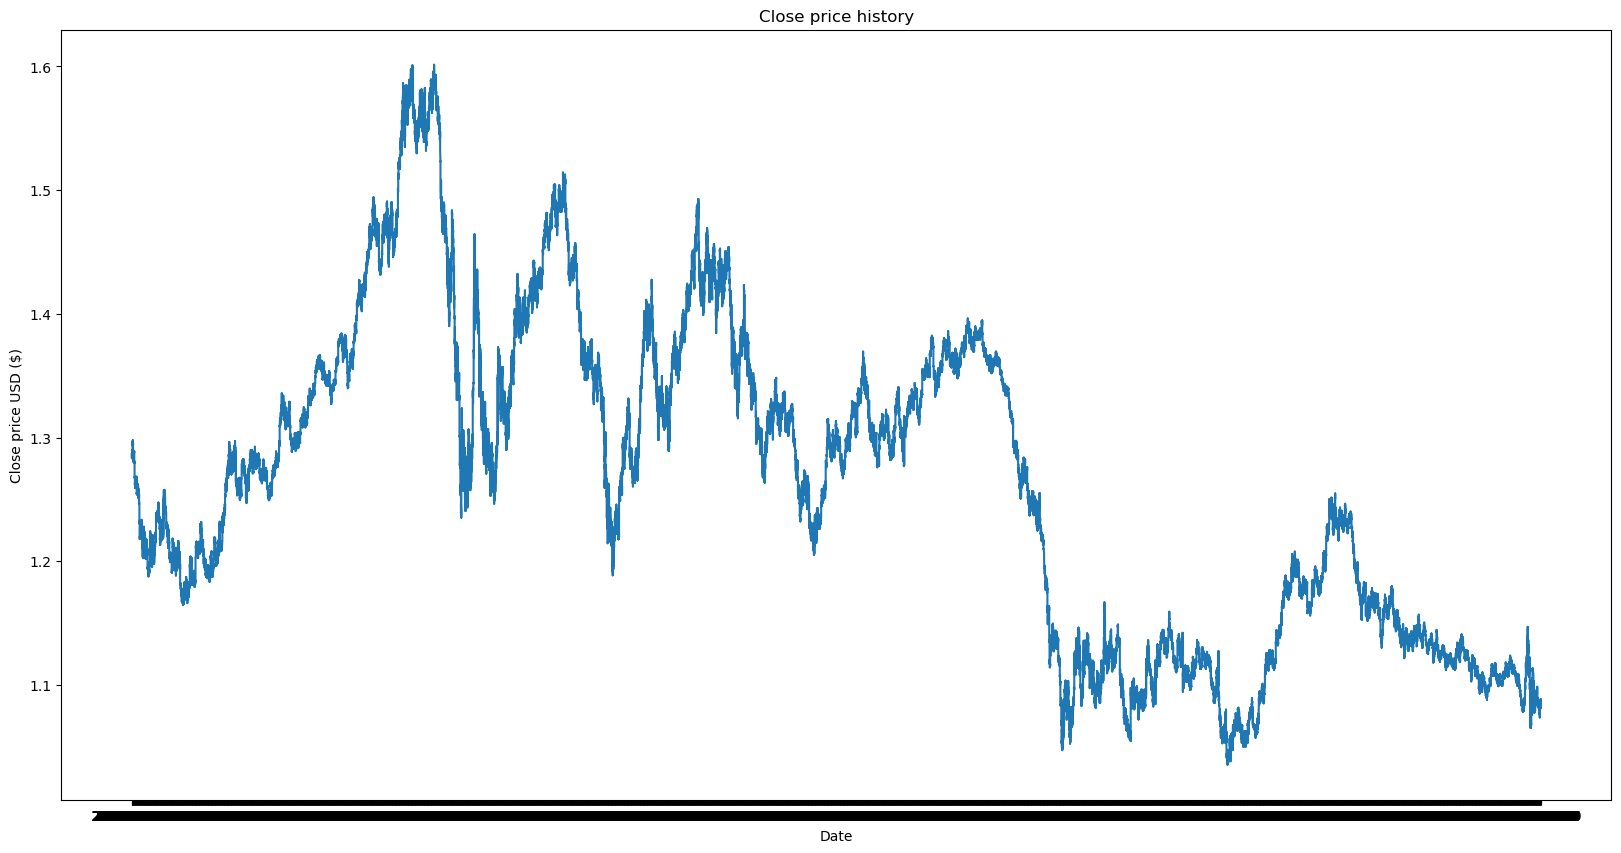

In [6]:
plt.figure(figsize=(20,10))
plt.title('Close price history')
plt.plot(data['BC'])
plt.xlabel('Date')
plt.ylabel('Close price USD ($)')
plt.show()

In [7]:
dataset = data.values
train_data_len = math.ceil(len(dataset)*0.95)
print('Length of training set: {}'.format(train_data_len))

Length of training set: 88430


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
scaled_data

array([[0.43978863],
       [0.43943518],
       [0.44102573],
       ...,
       [0.09106815],
       [0.09117418],
       [0.0916867 ]])

In [10]:
train_window = 20

In [11]:
train_data = scaled_data[0:train_data_len,:]
x_train = []
y_train = []

for i in range(train_window, len(train_data)):
    x_train.append(train_data[i-train_window:i,0])
    y_train.append(train_data[i, 0])

In [12]:
print('training set {}, and labels {}' .format(len(x_train), len(y_train)))

training set 88410, and labels 88410


In [13]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
print('Shape of x_train: {}\nShape of y_train: {}' .format(x_train.shape, y_train.shape))

Shape of x_train: (88410, 20)
Shape of y_train: (88410,)


In [15]:
x_train = np.reshape(x_train, newshape=(x_train.shape[0], x_train.shape[1], 1))

In [16]:
print('New shape of x_train: {}'.format(x_train.shape))

New shape of x_train: (88410, 20, 1)


In [35]:
def create_model():
    return Sequential(
    [LSTM(50, return_sequences=True, input_shape= (None, 1)),
    LSTM(50, return_sequences=False),
    Dense(100),
    Dense(50),
    Dense(1)])

In [36]:
model = create_model()
model.compile(optimizer='adamax', loss='mean_squared_error')

In [37]:
hist = model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
5526/5526 [==============================] - 47s 8ms/step - loss: 2.0852e-04
Epoch 2/10
5526/5526 [==============================] - 44s 8ms/step - loss: 2.9855e-05
Epoch 3/10
5526/5526 [==============================] - 43s 8ms/step - loss: 1.8103e-05
Epoch 4/10
5526/5526 [==============================] - 43s 8ms/step - loss: 1.4239e-05
Epoch 5/10
5526/5526 [==============================] - 44s 8ms/step - loss: 1.3121e-05
Epoch 6/10
5526/5526 [==============================] - 43s 8ms/step - loss: 1.2624e-05
Epoch 7/10
5526/5526 [==============================] - 43s 8ms/step - loss: 1.2791e-05
Epoch 8/10
5526/5526 [==============================] - 44s 8ms/step - loss: 1.2213e-05
Epoch 9/10
5526/5526 [==============================] - 44s 8ms/step - loss: 1.1842e-05
Epoch 10/10
5526/5526 [==============================] - 43s 8ms/step - loss: 1.1840e-05


In [38]:
test_window = 20

In [40]:
test_data = scaled_data[train_data_len-test_window: , :]
x_test = []
y_test = dataset[train_data_len:,:]
for i in range(test_window, len(test_data)):
      x_test.append(test_data[i-test_window:i,0])

In [41]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, newshape=(x_test.shape[0], x_test.shape[1], 1))
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

146/146 [==============================] - 1s 3ms/step


C:\Users\upraj\AppData\Local\Temp\ipykernel_8944\2673801655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


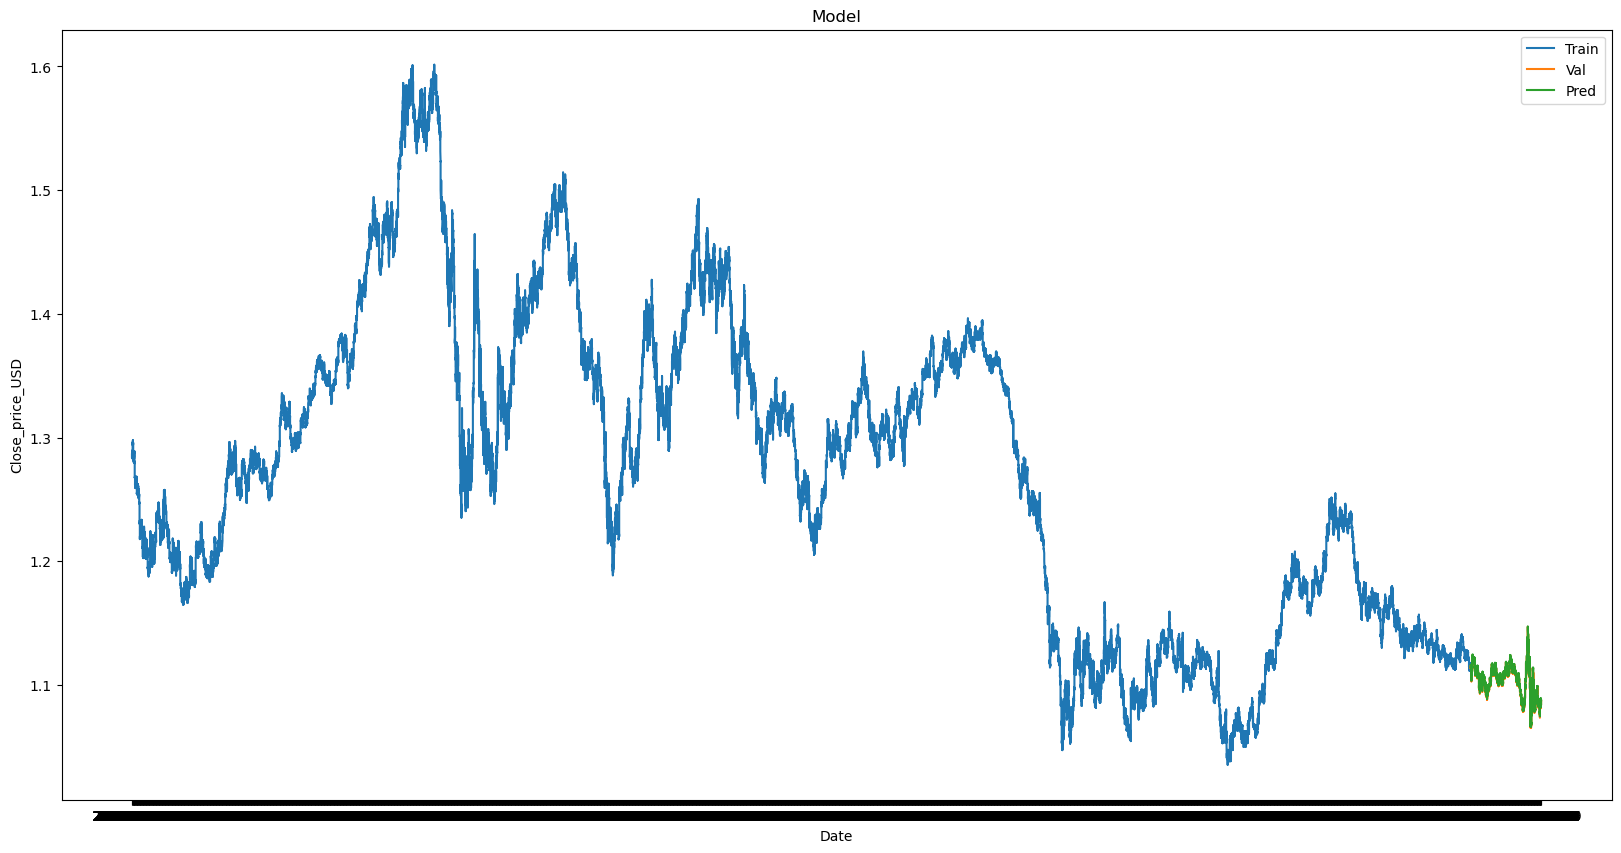

In [42]:
train = data[:train_data_len]
valid = data[train_data_len:]

valid['Predictions'] = pred

plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close_price_USD')
plt.plot(train['BC'])
plt.plot(valid[['BC', 'Predictions']])
plt.legend(['Train', 'Val','Pred'])
plt.show()

In [43]:
valid.head(5)

,BC,Closing First Difference,Seasonal First Difference,Predictions
Date,,,,
2019-07-30,1.11373,-0.00036,0.00017,1.114701
2019-07-30,1.11417,0.00044,0.00103,1.114363
2019-07-30,1.11423,0.00006,0.00139,1.114745
2019-07-30,1.11365,-0.00058,0.00102,1.114835
2019-07-30,1.11325,-0.00040,0.00057,1.114305


C:\Users\upraj\AppData\Local\Temp\ipykernel_8944\1795770243.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


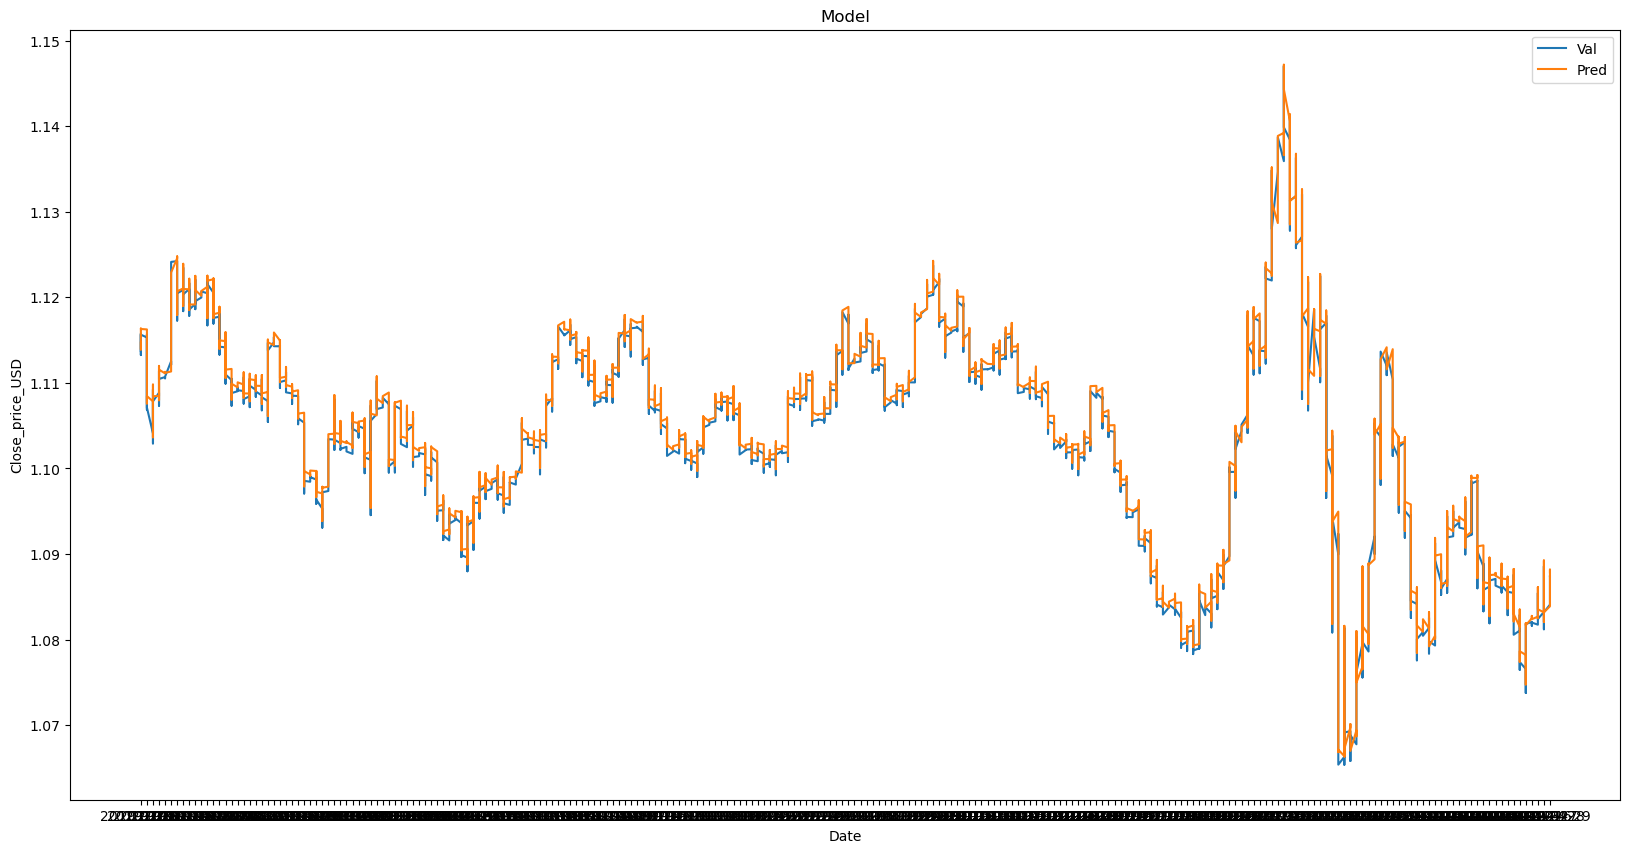

In [44]:
train = data[:train_data_len]
valid = data[train_data_len:]

valid['Predictions'] = pred

plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close_price_USD')
plt.plot(valid[['BC', 'Predictions']])
plt.legend(['Val','Pred'])
plt.show()

In [45]:
import pickle

In [47]:
pickle.dump(model,open('forex_lstmmodel.pkl','wb'))

In [48]:
pickled_model=pickle.load(open('forex_lstmmodel.pkl','rb'))

In [55]:
## Prediction
pickled_model.predict(scaler.transform(dataset[0].reshape(1,-1)))

1/1 [==============================] - 0s 13ms/step


array([[0.43021217]], dtype=float32)